In [43]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print(tf.__version__)

2.6.0


In [44]:
import numpy as np
from sklearn.model_selection import train_test_split

dataImages = None
dataLabels = None

datasetFileName = "dataset.npz"

with np.load(datasetFileName) as data:
    dataImages = data['images']
    dataLabels = data['labels']

classNames = ['Clean', 'Contaminated']


In [45]:
print(dataImages.shape)
dataImages.dtype


(248, 326, 244, 3)


dtype('uint8')

In [46]:
print(dataLabels.shape)
dataLabels.dtype


(248,)


dtype('int32')

In [47]:

# Split the data up in train and test sets
trainImages, testImages, trainLabels, testLabels = train_test_split(dataImages, dataLabels, test_size=0.33, random_state=42)


In [48]:
trainImages.dtype
print(trainImages.shape)

(166, 326, 244, 3)


In [49]:
print(trainLabels.shape)
trainLabels.dtype


(166,)


dtype('int32')

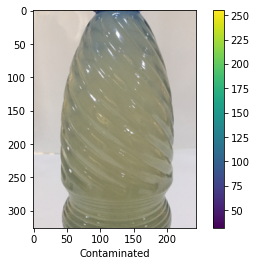

In [50]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(trainImages[0])
plt.xlabel(classNames[trainLabels[0]])
plt.colorbar()
plt.grid(False)
plt.show()

In [51]:
trainImages = trainImages / 255.0

testImages = testImages / 255.0

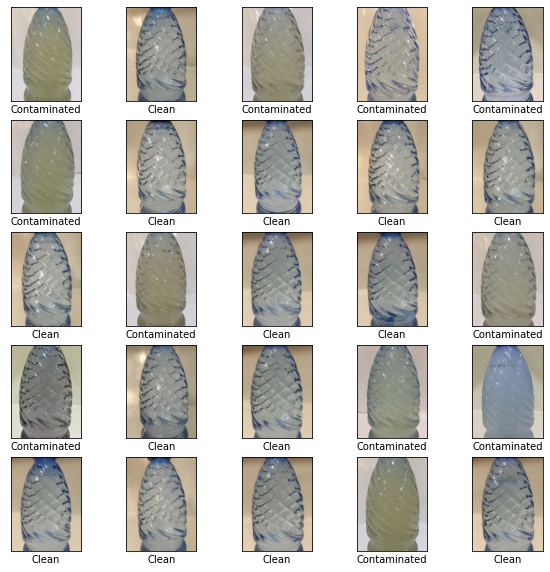

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainImages[i], cmap=plt.cm.binary)
    plt.xlabel(classNames[trainLabels[i]])
plt.show()

In [53]:
inputShape = trainImages[0].shape
print(inputShape)
outputShape = len(classNames)
print(outputShape)

(326, 244, 3)
2


In [54]:
import tensorflow as tf

model = tf.keras.Sequential([
    # tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Flatten(input_shape=inputShape),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(outputShape)
])
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 238632)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               30545024  
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 258       
Total params: 30,545,282
Trainable params: 30,545,282
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [56]:
model.fit(trainImages, trainLabels, epochs=10)

Epoch 1/10
6/6 [==============================] - 2s 198ms/step - loss: 33.5972 - accuracy: 0.5000
Epoch 2/10
6/6 [==============================] - 1s 205ms/step - loss: 21.7075 - accuracy: 0.5361
Epoch 3/10
6/6 [==============================] - 1s 192ms/step - loss: 1.2352 - accuracy: 0.8373
Epoch 4/10
6/6 [==============================] - 1s 209ms/step - loss: 2.2173 - accuracy: 0.8133
Epoch 5/10
6/6 [==============================] - 1s 209ms/step - loss: 0.1685 - accuracy: 0.9639
Epoch 6/10
6/6 [==============================] - 1s 202ms/step - loss: 0.1338 - accuracy: 0.9639
Epoch 7/10
6/6 [==============================] - 1s 191ms/step - loss: 0.0843 - accuracy: 0.9699
Epoch 8/10
6/6 [==============================] - 1s 212ms/step - loss: 0.0850 - accuracy: 0.9759
Epoch 9/10
6/6 [==============================] - 1s 185ms/step - loss: 0.1285 - accuracy: 0.9518
Epoch 10/10
6/6 [==============================] - 1s 173ms/step - loss: 0.3067 - accuracy: 0.9277


In [57]:
testLoss, testAcc = model.evaluate(testImages,  testLabels, verbose=2)

print('\nTest accuracy:', testAcc)

3/3 - 0s - loss: 0.3186 - accuracy: 0.9146

Test accuracy: 0.9146341681480408


In [58]:
predictions = model.predict(testImages)
predictions[0]

array([-42.865128, -44.584568], dtype=float32)

In [59]:
print(np.argmax(predictions[0]))
testLabels[0]

0


0

In [60]:
probabilityModel = tf.keras.Sequential([model, tf.keras.layers.Softmax()])


In [61]:
predictions = probabilityModel.predict(testImages)


In [62]:
predictions[0]

array([0.8480568 , 0.15194327], dtype=float32)

In [63]:
print(np.argmax(predictions[0]))
testLabels[0]

0


0

In [64]:
# functions for display

import matplotlib.pyplot as plt

def plot_image(i, predictionsArray, trueLabels, img):
  trueLabel, img = trueLabels[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predictedLabel = np.argmax(predictionsArray)
  if predictedLabel == trueLabel:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(classNames[predictedLabel],
                                100*np.max(predictionsArray),
                                classNames[trueLabel]),
                                color=color)

def plot_value_array(i, predictionsArray, trueLabels):
  trueLabel = trueLabels[i]
  plt.grid(False)
  plt.xticks(range(outputShape))
  plt.yticks([])
  thisplot = plt.bar(range(outputShape), predictionsArray, color="#777777")
  plt.ylim([0, 1])
  predictedLabel = np.argmax(predictionsArray)

  thisplot[predictedLabel].set_color('red')
  thisplot[trueLabel].set_color('blue')

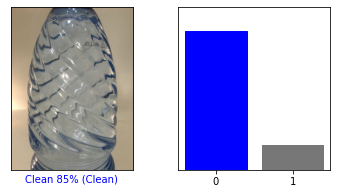

In [65]:
import matplotlib.pyplot as plt

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], testLabels, testImages)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  testLabels)
plt.show()

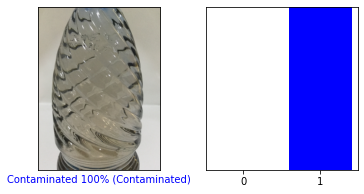

In [66]:
import matplotlib.pyplot as plt

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], testLabels, testImages)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  testLabels)
plt.show()

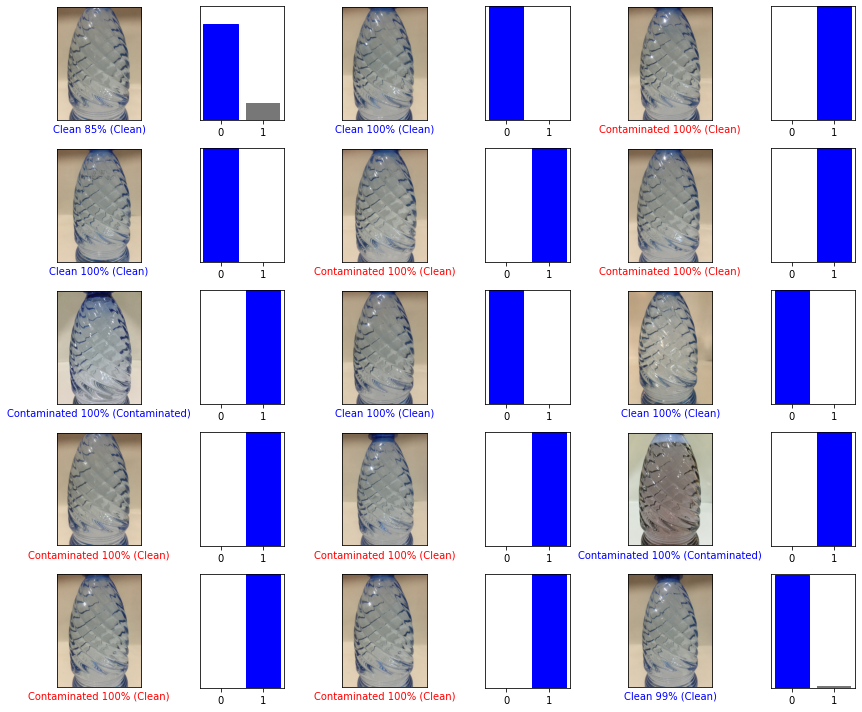

In [67]:
import matplotlib.pyplot as plt

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
high = testLabels.shape[0]
numRows = 5
numCols = 3
numImages = numRows*numCols

selectedIndex = np.random.randint(0, high, size=numImages)

somePredictions = predictions[selectedIndex]
someImages = testImages[selectedIndex]
someLabels = testLabels[selectedIndex]

plt.figure(figsize=(2*2*numCols, 2*numRows))
for i in range(numImages):
    plt.subplot(numRows, 2*numCols, 2*i+1)
    plot_image(i, predictions[i], someLabels, someImages)
    plt.subplot(numRows, 2*numCols, 2*i+2)
    plot_value_array(i, predictions[i], testLabels)
plt.tight_layout()
plt.show()

In [68]:
import numpy as np

# Grab an image from the test dataset.
img = testImages[1]
print(img.shape)

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)

(326, 244, 3)
(1, 326, 244, 3)


In [69]:
predictionsSingle = probabilityModel.predict(img)
print(predictionsSingle)

np.argmax(predictionsSingle[0])

[[9.9966824e-01 3.3171757e-04]]


0

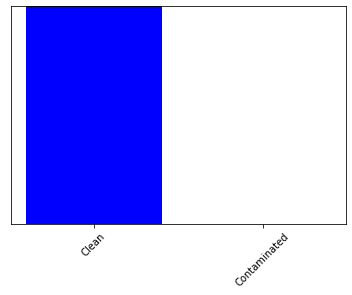

In [70]:
import matplotlib.pyplot as plt

plot_value_array(1, predictionsSingle[0], testLabels)
_ = plt.xticks(range(outputShape), classNames, rotation=45)
plt.show()


In [71]:
print('\nTest accuracy:', testAcc)


Test accuracy: 0.9146341681480408


In [72]:
#  SavedModel format
import os

exportPath = ""

if testAcc > 0.95:
    modelDir = 'tf_model'
    version = f"4_{(testAcc*100):.0f}"

    # for SavedModel format
    exportPath = os.path.join(modelDir, version)
    # save the model
    model.save(exportPath, save_format="tf")

    print('\nexport path = {}'.format(exportPath))

    !dir {exportPath}

In [73]:
#  HDF5 format
import os

exportPath = ""

if testAcc > 0.95:
    modelDir = 'tf_model'
    version = f"4_{(testAcc*100):.0f}"

    # for HDF5 format
    exportPath = os.path.join(modelDir, f"{version}.h5")
    # Save the entire model to a HDF5 file.
    # The '.h5' extension indicates that the model should be saved to HDF5.
    model.save(exportPath)

    !dir {exportPath}